In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing necessary Libraries

In [3]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
import h5py

Using TensorFlow backend.


In [0]:
h5f=h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5','r')

In [0]:
X_train= h5f['X_train'][:]
Y_train=h5f['y_train'][:]

X_val= h5f['X_val'][:]
Y_val=h5f['y_val'][:]

X_test= h5f['X_test'][:]
Y_test=h5f['y_test'][:]

h5f.close()

## Flattening the images for keras

In [6]:
X_train.shape

(42000, 32, 32)

In [0]:
fX_train=X_train.reshape(X_train.shape[0],1024)
fX_test=X_test.reshape(X_test.shape[0],1024)
fX_val=X_val.reshape(X_val.shape[0],1024)

# Normalising the input

In [0]:
nfX_train=fX_train/255.0
nfX_test=fX_test/255.0
nfX_val=fX_val/255.0

# Converting Class metric to one hot encoding

In [0]:
HY_train=tf.keras.utils.to_categorical(Y_train,num_classes=10)
HY_test=tf.keras.utils.to_categorical(Y_test,num_classes=10)
HY_val=tf.keras.utils.to_categorical(Y_val,num_classes=10)

# Printing train,test,val size

In [9]:
print('Size of train set after flattening',nfX_train.shape)
print('number of samples in train set',X_train.shape[0])
print('Size of a image in train set',X_train.shape[1:])

print('Size of test set after flattening',nfX_test.shape)
print('number of samples in test set',X_test.shape[0])
print('Size of a image in test set',X_test.shape[1:])

print('Size of Validaiton set after flattening',nfX_val.shape)
print('number of samples in Validation set',X_val.shape[0])
print('Size of a image in Validation set',X_val.shape[1:])


Size of train set after flattening (42000, 1024)
number of samples in train set 42000
Size of a image in train set (32, 32)
Size of test set after flattening (18000, 1024)
number of samples in test set 18000
Size of a image in test set (32, 32)
Size of Validaiton set after flattening (60000, 1024)
number of samples in Validation set 60000
Size of a image in Validation set (32, 32)


Here the size of validation dataset is higher than the training dataser, which is usually not the case. Training dataset will be higher than validation. 
First, lets train the model for the given dataset and then as new trial lets combine the train and val set and the split it in 70:30 ratio

Visualising first 10 images

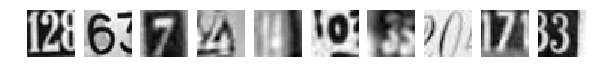

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (Y_train[0:10]))

The images are not clear. Images contain multiple numbers. Model has to learn to classify the image to the number which is more predominant (clear). 

# Creating a Keras Sequential model

In [0]:
def train_val_loop(X,y,Xval,yval,n,act,epoch,verb=True,LR=0.01,L2=0,opti='sgd',m=0):
    
  Learning_rate=LR
  neurons=n
  Regularize=L2
  Activation=act
  momentum=m

  modelx=tf.keras.models.Sequential()
  modelx.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))
    
  for i in range(0,len(neurons)):
    modelx.add(tf.keras.layers.Dense(n[i],activation=Activation[i],kernel_regularizer=keras.regularizers.l2(l=Regularize)))
    
  if opti=='sgd':
    Optimizer = tf.keras.optimizers.SGD(lr=Learning_rate,momentum=m)
  if opti=='adam':
    Optimizer=tf.keras.optimizers.Adam(lr=Learning_rate)
    
  modelx.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  modelx.fit(X,y,validation_data=(Xval,yval),batch_size=30,epochs=epoch,verbose=verb)
    
  return modelx

In [14]:
modeln=train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[10,10],['relu','softmax'],1,True,0.00001)

Train on 42000 samples, validate on 60000 samples
42000/42000 [==============================] - 7s 178us/sample - loss: 2.6091 - acc: 0.0990 - val_loss: 2.5795 - val_acc: 0.0995


The accuracy is 9% and output class is 10 so it seems somewhat reasonable model. and Loss is 2.6 which is also reasonable. so model makes sense

Testing by setting high value for lambda

In [15]:
modeln=train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[10,10],['relu','softmax'],1,True,0.00001,1e3)

Train on 42000 samples, validate on 60000 samples
42000/42000 [==============================] - 8s 189us/sample - loss: 537.5397 - acc: 0.1003 - val_loss: 2.3026 - val_acc: 0.1000


As known with high value of l2 regularizer the loss increases to very high value 

# Over fit on a small batch of data

In [0]:
nfX_train=nfX_train[:20]
HY_train=HY_train[:20]

In [17]:
modeln=train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[10,10],['relu','softmax'],30,True,0.0001)

Train on 20 samples, validate on 60000 samples
Epoch 1/30
20/20 [==============================] - 4s 201ms/sample - loss: 3.4214 - acc: 0.1000 - val_loss: 2.5091 - val_acc: 0.1000
Epoch 2/30
20/20 [==============================] - 4s 200ms/sample - loss: 3.4094 - acc: 0.1000 - val_loss: 2.5042 - val_acc: 0.1000
Epoch 3/30
20/20 [==============================] - 4s 197ms/sample - loss: 3.3975 - acc: 0.1000 - val_loss: 2.4993 - val_acc: 0.1000
Epoch 4/30
20/20 [==============================] - 4s 197ms/sample - loss: 3.3856 - acc: 0.1000 - val_loss: 2.4946 - val_acc: 0.1000
Epoch 5/30
20/20 [==============================] - 4s 201ms/sample - loss: 3.3739 - acc: 0.1000 - val_loss: 2.4901 - val_acc: 0.1000
Epoch 6/30
20/20 [==============================] - 4s 195ms/sample - loss: 3.3622 - acc: 0.1000 - val_loss: 2.4856 - val_acc: 0.1000
Epoch 7/30
20/20 [==============================] - 4s 198ms/sample - loss: 3.3506 - acc: 0.1000 - val_loss: 2.4812 - val_acc: 0.1000
Epoch 8/30
20/2

Model is not overfitting. Lets try increasing the learning rate

In [0]:
modeln=train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[10,10],['relu','softmax'],30,True,0.01)

Train on 20 samples, validate on 60000 samples
Epoch 1/30
20/20 [==============================] - 4s 191ms/sample - loss: 2.6388 - acc: 0.1000 - val_loss: 2.4301 - val_acc: 0.1028
Epoch 2/30
20/20 [==============================] - 4s 187ms/sample - loss: 2.3620 - acc: 0.1500 - val_loss: 2.3881 - val_acc: 0.1040
Epoch 3/30
20/20 [==============================] - 4s 188ms/sample - loss: 2.1952 - acc: 0.1500 - val_loss: 2.3953 - val_acc: 0.1029
Epoch 4/30
20/20 [==============================] - 4s 188ms/sample - loss: 2.0603 - acc: 0.1000 - val_loss: 2.3845 - val_acc: 0.1020
Epoch 5/30
20/20 [==============================] - 4s 192ms/sample - loss: 1.9620 - acc: 0.2000 - val_loss: 2.3793 - val_acc: 0.1021
Epoch 6/30
20/20 [==============================] - 4s 198ms/sample - loss: 1.8741 - acc: 0.4000 - val_loss: 2.3763 - val_acc: 0.1023
Epoch 7/30
20/20 [==============================] - 4s 189ms/sample - loss: 1.8083 - acc: 0.4500 - val_loss: 2.3802 - val_acc: 0.1014
Epoch 8/30
20/2

training accuracy has but still not good enough. lets change the network architecture

In [0]:
modeln=train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[200,100,10],['relu','relu','softmax'],30,True,0.01)

Train on 20 samples, validate on 60000 samples
Epoch 1/30
20/20 [==============================] - 4s 218ms/sample - loss: 2.5585 - acc: 0.1500 - val_loss: 2.3595 - val_acc: 0.0997
Epoch 2/30
20/20 [==============================] - 4s 202ms/sample - loss: 2.1985 - acc: 0.2000 - val_loss: 2.3674 - val_acc: 0.0997
Epoch 3/30
20/20 [==============================] - 4s 203ms/sample - loss: 1.9328 - acc: 0.4500 - val_loss: 2.3740 - val_acc: 0.0994
Epoch 4/30
20/20 [==============================] - 4s 203ms/sample - loss: 1.7292 - acc: 0.4500 - val_loss: 2.3797 - val_acc: 0.0996
Epoch 5/30
20/20 [==============================] - 4s 201ms/sample - loss: 1.5597 - acc: 0.5500 - val_loss: 2.3859 - val_acc: 0.0994
Epoch 6/30
20/20 [==============================] - 4s 201ms/sample - loss: 1.4119 - acc: 0.6500 - val_loss: 2.3916 - val_acc: 0.0991
Epoch 7/30
20/20 [==============================] - 4s 208ms/sample - loss: 1.2834 - acc: 0.7500 - val_loss: 2.3966 - val_acc: 0.0988
Epoch 8/30
20/2

The above architecture seems good enough but lets try agian by increasing the layers

In [0]:
modeln=train_val_loop(nfX_train,HY_train,nfX_val,HY_val,
             [250,200,100,50,10],
             ['relu','relu','relu','relu','softmax'],30,True,0.01)

Train on 20 samples, validate on 60000 samples
Epoch 1/30
20/20 [==============================] - 5s 225ms/sample - loss: 2.3435 - acc: 0.1500 - val_loss: 2.3150 - val_acc: 0.1037
Epoch 2/30
20/20 [==============================] - 5s 228ms/sample - loss: 2.2085 - acc: 0.2000 - val_loss: 2.3173 - val_acc: 0.1036
Epoch 3/30
20/20 [==============================] - 5s 230ms/sample - loss: 2.1072 - acc: 0.3000 - val_loss: 2.3194 - val_acc: 0.1026
Epoch 4/30
20/20 [==============================] - 5s 226ms/sample - loss: 2.0243 - acc: 0.4500 - val_loss: 2.3214 - val_acc: 0.1020
Epoch 5/30
20/20 [==============================] - 5s 229ms/sample - loss: 1.9522 - acc: 0.5000 - val_loss: 2.3240 - val_acc: 0.1012
Epoch 6/30
20/20 [==============================] - 5s 227ms/sample - loss: 1.8854 - acc: 0.5000 - val_loss: 2.3264 - val_acc: 0.1009
Epoch 7/30
20/20 [==============================] - 4s 218ms/sample - loss: 1.8191 - acc: 0.5000 - val_loss: 2.3299 - val_acc: 0.0996
Epoch 8/30
20/2

It seems model takes higher number of iterations to learn than the previous trial, so lets stick with 3 hidden layers with 200,100,10 neurons after fine tuning we will train this architecture also

# Reloading the dataset

In [0]:
h5f=h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5','r')

X_train= h5f['X_train'][:]
Y_train=h5f['y_train'][:]

X_val= h5f['X_val'][:]
Y_val=h5f['y_val'][:]

X_test= h5f['X_test'][:]
Y_test=h5f['y_test'][:]

h5f.close()

fX_train=X_train.reshape(X_train.shape[0],1024)
fX_test=X_test.reshape(X_test.shape[0],1024)
fX_val=X_val.reshape(X_val.shape[0],1024)

nfX_train=fX_train/255.0
nfX_test=fX_test/255.0
nfX_val=fX_val/255.0

HY_train=tf.keras.utils.to_categorical(Y_train,num_classes=10)
HY_test=tf.keras.utils.to_categorical(Y_test,num_classes=10)
HY_val=tf.keras.utils.to_categorical(Y_val,num_classes=10)

Seems good. Lets try with lower value of learning rate and Lambda

Learning rate : 1e-7

Lamda : 1e-7

In [0]:
modeln=train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[200,100,10],['relu','relu','softmax'],30,False,1e-7,1e-7)
modeln.evaluate(nfX_val,HY_val)

60000/60000 [==============================] - 4s 67us/sample - loss: 2.8387 - acc: 0.1042


[2.8386967637379965, 0.104166664]

Loss and accuracy are both low lets try increasing Learning rate a little

Learning rate : 1e-4

Lamda : 1e-7

In [0]:
modeln=train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[200,100,10],['relu','relu','softmax'],30,False,1e-4,1e-7)
modeln.evaluate(nfX_val,HY_val)

60000/60000 [==============================] - 4s 63us/sample - loss: 1.7271 - acc: 0.4873


[1.7270950929323832, 0.48731667]

Lets try high value of Learning rate

Learning rate : 1e2

Lamda : 1e-7

In [0]:
modeln=train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[200,100,10],['relu','relu','softmax'],30,False,1e2,1e-7)
modeln.evaluate(nfX_val,HY_val)

60000/60000 [==============================] - 4s 66us/sample - loss: nan - acc: 0.1000


[nan, 0.1]

SO the loss increase to nan

lets do a coarse search with

 learning rate : 1e-4 to 1e2

 Lambda : 1e-5 to 1e5


In [0]:
import math
for k in range(1,50):
    lr = math.pow(10, np.random.uniform(-4.0, 1.0))
    Lambda = math.pow(10, np.random.uniform(-4,4))
    modeln= train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[200,100,10],['relu','relu','softmax'],30,False,lr,Lambda)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 50, modeln.evaluate(nfX_val,HY_val), lr, Lambda))

60000/60000 [==============================] - 4s 65us/sample - loss: 5.5826 - acc: 0.3651
Try 1/50: Best_val_acc: [5.582575669606527, 0.3651], lr: 0.00018236554827874956, Lambda: 0.08208476810007129

60000/60000 [==============================] - 4s 66us/sample - loss: 2.7264 - acc: 0.5694
Try 2/50: Best_val_acc: [2.7263506132125856, 0.56943333], lr: 0.00013652024075847173, Lambda: 0.002598472054511446

60000/60000 [==============================] - 4s 66us/sample - loss: 2.3026 - acc: 0.1000
Try 3/50: Best_val_acc: [2.302613067626953, 0.1], lr: 0.0013934480587437861, Lambda: 1.6209805004140698

60000/60000 [==============================] - 4s 67us/sample - loss: 0.5815 - acc: 0.8931
Try 4/50: Best_val_acc: [0.5814547545353571, 0.89306664], lr: 0.011526808765254073, Lambda: 0.0005513519848926906

60000/60000 [==============================] - 4s 65us/sample - loss: nan - acc: 0.1000
Try 5/50: Best_val_acc: [nan, 0.1], lr: 0.40490510954579106, Lambda: 6.441866544870449

60000/60000 [=

The results shows that accuracy is poor for large values of Lambda and Lr

The good results with accuracy above 80% appears for following range of values

Learning rate: 0.0071 to 0.0922

Lambda: 0.00017 to 0.0015 -

now since the lambda is at the extreme of our limits lets try extending it further


perform trial for 

Learning rate =0.0001 to 0.1

Lambda- 1e-8 to 1e-2





In [0]:
import math
for k in range(1,51):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-8,-2))
    modeln= train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[200,100,10],['relu','relu','softmax'],30,False,lr,Lambda)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 50, modeln.evaluate(nfX_val,HY_val), lr, Lambda))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
60000/60000 [==============================] - 4s 63us/sample - loss: 1.5600 - acc: 0.5494
Try 1/50: Best_val_acc: [1.5599735478719075, 0.54943335], lr: 0.00012746000867255232, Lambda: 7.877776769805744e-06

60000/60000 [==============================] - 4s 63us/sample - loss: 0.4182 - acc: 0.8849
Try 2/50: Best_val_acc: [0.41822672241131464, 0.88491666], lr: 0.0037585550281953287, Lambda: 1.0579592552310723e-05

60000/60000 [==============================] - 4s 63us/sample - loss: 0.6327 - acc: 0.8275
Try 3/50: Best_val_acc: [0.6326905809322994, 0.82746667], lr: 0.0011812811132555516, Lambda: 3.693093510946086e-05

60000/60000 [==============================] - 4s 64us/sample - loss: 0.6961 - acc: 0.8789
Try 4/50: Best_val_acc: [0.6960772668202718, 0.8788667], lr: 0.010054973560337707, Lambda: 0.0015458167184027672

60000/60000 [==============================] - 4s 62us/sample - loss: 0.8254 - acc: 0.7644

In this trial, none of the accuracy is nan, thus we are nearing the optimum value of parameters

The good results with accuracy above 88% appears for following range of values

Learning rate: 0.0037 to 0.048

Lambda: 1.2e-8 to 2.4e-4

Lambda being small shows the good validation results occur without regularization

now since the lambda is at the extreme of our limits lets try extending it further


perform trial for 

Learning rate =0.002 to 0.07

Lambda- 1e-8 to 1e-4

In [0]:
import math
for k in range(1,51):
    lr = np.random.uniform(0.002, 0.07)
    Lambda = math.pow(10, np.random.uniform(-8,-4))
    modeln= train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[200,100,10],['relu','relu','softmax'],30,False,lr,Lambda)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 50, modeln.evaluate(nfX_val,HY_val), lr, Lambda))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3564 - acc: 0.8978
Try 1/50: Best_val_acc: [0.3563851696369549, 0.89775], lr: 0.04448501148744529, Lambda: 8.027830774253326e-08

60000/60000 [==============================] - 3s 53us/sample - loss: 0.4001 - acc: 0.8995
Try 2/50: Best_val_acc: [0.40009393161733947, 0.8994667], lr: 0.015257939807517535, Lambda: 6.590125393019313e-05

60000/60000 [==============================] - 3s 54us/sample - loss: 0.3481 - acc: 0.9023
Try 3/50: Best_val_acc: [0.34814802435437836, 0.9023167], lr: 0.023340518147244096, Lambda: 7.075706764578177e-06

60000/60000 [==============================] - 3s 55us/sample - loss: 0.3403 - acc: 0.9053
Try 4/50: Best_val_acc: [0.34028420534804465, 0.90525], lr: 0.017993295039670988, Lambda: 2.596859177971537e-08

60000/60000 [==============================] - 3s 56us/sample - loss: 0.3565 - acc: 0.9005
Try 5/50: 

Nearly for all the values of learning rate and Lamda in the above specified range accuracy is higher than 88 % (except one)

Now we have identified the range of values. Meaning the loss curve is Flat in this zone

High Validation accuracy of 90.8 % occurs for
learning rate: 0.019560946340911864
Lambda: 4.715676601623284e-07

Lamda being very small means. no need of regularization

Lets increase the number of epochs and train the model further

In [0]:
modeln= train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[200,100,10],['relu','relu','softmax'],500,True,0.019560946340911864,4.715676601623284e-07)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 42000 samples, validate on 60000 samples
Epoch 1/500
42000/42000 [==============================] - 10s 244us/sample - loss: 1.4340 - acc: 0.5289 - val_loss: 0.9727 - val_acc: 0.7003
Epoch 2/500
42000/42000 [==============================] - 9s 210us/sample - loss: 0.9828 - acc: 0.6925 - val_loss: 0.7572 - val_acc: 0.7749
Epoch 3/500
42000/42000 [==============================] - 9s 209us/sample - loss: 0.8496 - acc: 0.7364 - val_loss: 0.6624 - val_acc: 0.8046
Epoch 4/500
42000/42000 [==============================] - 8s 201us/sample - loss: 0.7716 - acc: 0.7622 - val_loss: 0.6158 - val_acc: 0.8195
Epoch 5/500
42000/42000 [==============================] - 9s 204us/sample - loss: 0.7236 - acc: 0.7757 - val_loss: 0.5882 - val_acc: 0.8283
Epoch 6/500
42000/42000 [==============================] - 8s 200us/sample - loss: 0.6794 - acc: 0.7890 - val_loss: 0.5494 - val_acc: 0.8387
Epoch 7/500
42000/4200

Accuracy increased form 90 to 95 %

The above Results shows that the accuracy increases with epoch and after a certain number of epoch say 230 epochs, the accuracy is not improving further


Lets try changing the architecture for the same parameters



In [0]:
modeln= train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[250,200,100,10],['relu','relu','relu','softmax'],500,True,0.019560946340911864,4.715676601623284e-07)

Train on 42000 samples, validate on 60000 samples
Epoch 1/500
42000/42000 [==============================] - 9s 219us/sample - loss: 1.4654 - acc: 0.5182 - val_loss: 0.9590 - val_acc: 0.6999
Epoch 2/500
42000/42000 [==============================] - 9s 208us/sample - loss: 0.9806 - acc: 0.6907 - val_loss: 0.7747 - val_acc: 0.7681
Epoch 3/500
42000/42000 [==============================] - 9s 205us/sample - loss: 0.8448 - acc: 0.7368 - val_loss: 0.6417 - val_acc: 0.8083
Epoch 4/500
42000/42000 [==============================] - 9s 216us/sample - loss: 0.7635 - acc: 0.7609 - val_loss: 0.6034 - val_acc: 0.8181
Epoch 5/500
42000/42000 [==============================] - 9s 210us/sample - loss: 0.6990 - acc: 0.7819 - val_loss: 0.5869 - val_acc: 0.8243
Epoch 6/500
42000/42000 [==============================] - 9s 208us/sample - loss: 0.6600 - acc: 0.7928 - val_loss: 0.5395 - val_acc: 0.8385
Epoch 7/500
42000/42000 [==============================] - 9s 215us/sample - loss: 0.6229 - acc: 0.8040 

With increase in number of layers
1) The model learns faster. 
2) The model training accuracy has increased. But Validation accuracy remains the same at 95% . The difference between training and validation accuracy is low to call it overfitting

Lets try increasing the number of neurons in the layer


In [7]:
model_1= train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[350,250,150,10],['relu','relu','relu','softmax'],500,True,0.019560946340911864,4.715676601623284e-07)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 42000 samples, validate on 60000 samples
Epoch 1/500
42000/42000 [==============================] - 10s 244us/sample - loss: 1.4500 - acc: 0.5194 - val_loss: 0.9439 - val_acc: 0.7107
Epoch 2/500
42000/42000 [==============================] - 8s 201us/sample - loss: 0.9473 - acc: 0.7009 - val_loss: 0.7445 - val_acc: 0.7736
Epoch 3/500
42000/42000 [==============================] - 8s 201us/sample - loss: 0.8130 - acc: 0.7437 - val_loss: 0.6329 - val_acc: 0.8126
Epoch 4/500
42000/42000 [==============================] - 8s 202us/sample - loss: 0.7287 - acc: 0.7706 - val_loss: 0.5973 - val_acc: 0.8206
Epoch 5/500
42000/42000 [==============================] - 9s 204us/sample - loss: 0.6742 - acc: 0.7872 - val_loss: 0.5308 - val_acc: 0.8408
Epoch 6/500
42000/42000 [==============================] - 9s 203us/sample - loss: 0.6275 - acc: 0.8011 - val_loss: 0.5144 - val_acc: 0.8470
Epoch 7/500
42000/4200

With increase in number of neurons
1) The model learns faster than before 
2) The model training accuracy has increased to 98.37%. But Validation accuracy remains the same at 95% . The difference between training and validation accuracy is low to call it overfitting

Lets try using momentum of 0.9

In [0]:
modeln= train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[350,250,150,10],['relu','relu','relu','softmax'],500,True,0.019560946340911864,4.715676601623284e-07,'sgd',0.9)

Train on 42000 samples, validate on 60000 samples
Epoch 1/500
42000/42000 [==============================] - 10s 230us/sample - loss: 1.4351 - acc: 0.5265 - val_loss: 1.0495 - val_acc: 0.6797
Epoch 2/500
42000/42000 [==============================] - 8s 194us/sample - loss: 1.0840 - acc: 0.6609 - val_loss: 0.8483 - val_acc: 0.7424
Epoch 3/500
42000/42000 [==============================] - 8s 195us/sample - loss: 0.9776 - acc: 0.7002 - val_loss: 0.8351 - val_acc: 0.7442
Epoch 4/500
42000/42000 [==============================] - 8s 192us/sample - loss: 0.9071 - acc: 0.7227 - val_loss: 0.7139 - val_acc: 0.7833
Epoch 5/500
42000/42000 [==============================] - 8s 198us/sample - loss: 0.8471 - acc: 0.7419 - val_loss: 0.6790 - val_acc: 0.7945
Epoch 6/500
42000/42000 [==============================] - 8s 202us/sample - loss: 0.8050 - acc: 0.7540 - val_loss: 0.6836 - val_acc: 0.7944
Epoch 7/500
42000/42000 [==============================] - 8s 198us/sample - loss: 0.7739 - acc: 0.7634

With use of momentum, till say ~150 epochs the model is learning and accuracy is improving. but after that the model accuracy suddenly drops to 10% and it is not increasing further. the model is oscillating back and forth

Lets try using adams model with tensorflow default parameter

In [0]:
modeln= train_val_loop(nfX_train,HY_train,nfX_val,HY_val,[350,250,150,10],['relu','relu','relu','softmax'],100,True,.001,1e-8,'adam')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 10s 232us/sample - loss: 1.3438 - acc: 0.5556 - val_loss: 0.8898 - val_acc: 0.7193
Epoch 2/100
42000/42000 [==============================] - 8s 182us/sample - loss: 0.9528 - acc: 0.6958 - val_loss: 0.7311 - val_acc: 0.7765
Epoch 3/100
42000/42000 [==============================] - 8s 185us/sample - loss: 0.8298 - acc: 0.7366 - val_loss: 0.6541 - val_acc: 0.7975
Epoch 4/100
42000/42000 [==============================] - 8s 185us/sample - loss: 0.7583 - acc: 0.7578 - val_loss: 0.6137 - val_acc: 0.8109
Epoch 5/100
42000/42000 [==============================] - 8s 189us/sample - loss: 0.6961 - acc: 0.7792 - val_loss: 0.5773 - val_acc: 0.8215
Epoch 6/100
42000/42000 [==============================] - 8s 189us/sample - loss: 0.6547 - acc: 0.7942 - val_loss: 0.5282 - val_acc: 0.8369
Epoch 7/100
42000/4200

This model is good too, this also show similar performance as SGD. with default parameter. Lets try hyperparameter optimiztion

Learning rate: 1e-3 to 1
Lamda: 1e-7 to 10
Dropout: 0 to 0.5


**Lets use adam optimizer with earlystopping and train for 50 iterations. (higher than SGD trial)**

In [0]:
import math
from keras.callbacks import EarlyStopping
for k in range(1,51):
  Learning_rate=math.pow(10, np.random.uniform(-4,0))
  neurons=[350,250,150,10]
  Regularize=math.pow(10, np.random.uniform(-8,1))
  Activation=['relu','relu','relu','softmax']
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=False, patience=5)
  do=np.random.uniform(0,0.5)
  Optimizer=tf.keras.optimizers.Adam(lr=Learning_rate)

  modelx=tf.keras.models.Sequential()
  modelx.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))
    
  for i in range(0,len(neurons)):
    modelx.add(tf.keras.layers.Dense(neurons[i],activation=Activation[i],kernel_regularizer=keras.regularizers.l2(l=Regularize)))
    if i != (len(neurons)-1):
      modelx.add(tf.keras.layers.Dropout(do))   
    
  modelx.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  modelx.fit(nfX_train,HY_train,validation_data=(nfX_val,HY_val),batch_size=30,epochs=50,verbose=False,callbacks=[es])

  print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}, Dropout: {5}\n".format(k, 50, modelx.evaluate(nfX_val,HY_val),Learning_rate,Regularize,do))



60000/60000 [==============================] - 4s 67us/sample - loss: 2.3494 - acc: 0.1000
Try 1/50: Best_val_acc: [2.3494174719492595, 0.1], lr: 0.335858276035639, Lambda: 0.0077473502710283405, Dropout: 0.1828850422425532

60000/60000 [==============================] - 4s 65us/sample - loss: 2.3257 - acc: 0.1000
Try 2/50: Best_val_acc: [2.3256923795700075, 0.1], lr: 0.179508625429429, Lambda: 7.431940693105811e-06, Dropout: 0.08511076304206011

60000/60000 [==============================] - 4s 65us/sample - loss: 2.3038 - acc: 0.1000
Try 3/50: Best_val_acc: [2.3037890195210773, 0.1], lr: 0.00607718466427572, Lambda: 0.030631179201924912, Dropout: 0.41340639618186853

60000/60000 [==============================] - 4s 67us/sample - loss: 899.8380 - acc: 0.1000
Try 4/50: Best_val_acc: [899.8380249023437, 0.1], lr: 0.2805338625265805, Lambda: 5.728929433367494e-05, Dropout: 0.16578072986437137

60000/60000 [==============================] - 4s 66us/sample - loss: 2.3215 - acc: 0.1000
Try

Based on the above results good results above 88% occur for 


Learning rate : 1e-4 to 1e-3  
lamda : 2e-8 to 1e-3
Dropout : 0.10 to 0.41

So lets try finesearch with following parameters

Learning rate : 1e-4 to 1e-2  
lamda : 1e-8 to 1e-3

Dropout :0 to 0.7


In [0]:
import math
from keras.callbacks import EarlyStopping
for k in range(1,51):
  Learning_rate=math.pow(10, np.random.uniform(-5,-3))
  neurons=[350,250,150,10]
  Regularize=math.pow(10, np.random.uniform(-8,-3))
  Activation=['relu','relu','relu','softmax']
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=False, patience=5)
  do=np.random.uniform(0,0.7)
  Optimizer=tf.keras.optimizers.Adam(lr=Learning_rate)

  modelx=tf.keras.models.Sequential()
  modelx.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))
    
  for i in range(0,len(neurons)):
    modelx.add(tf.keras.layers.Dense(neurons[i],activation=Activation[i],kernel_regularizer=keras.regularizers.l2(l=Regularize)))
    if i != (len(neurons)-1):
      modelx.add(tf.keras.layers.Dropout(do))   
    
  modelx.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  modelx.fit(nfX_train,HY_train,validation_data=(nfX_val,HY_val),batch_size=128,epochs=30,verbose=False,callbacks=[es])

  print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}, Dropout: {5}\n".format(k, 50, modelx.evaluate(nfX_val,HY_val),Learning_rate,Regularize,do))



60000/60000 [==============================] - 5s 76us/sample - loss: 0.5206 - acc: 0.8512
Try 1/50: Best_val_acc: [0.5205991354544958, 0.85118335], lr: 0.0008911061828518497, Lambda: 1.702728080774462e-07, Dropout: 0.5074706657149367

60000/60000 [==============================] - 5s 76us/sample - loss: 0.8167 - acc: 0.7718
Try 2/50: Best_val_acc: [0.8167142047564189, 0.77185], lr: 0.0006196679196760468, Lambda: 2.273797228012805e-06, Dropout: 0.6702086860093851

60000/60000 [==============================] - 5s 79us/sample - loss: 0.6663 - acc: 0.8139
Try 3/50: Best_val_acc: [0.6662896778424581, 0.8139167], lr: 7.725338918613566e-05, Lambda: 1.9111119500577555e-06, Dropout: 0.4954869921603956

60000/60000 [==============================] - 5s 81us/sample - loss: 0.6548 - acc: 0.8120
Try 4/50: Best_val_acc: [0.6548317306121191, 0.81196666], lr: 1.971833698140096e-05, Lambda: 6.495369368238641e-06, Dropout: 0.1623043923041183

60000/60000 [==============================] - 5s 84us/samp


There are few trials with validation accuracy greater than 90%

The validation accuracy is higher for 

lr: 0.0003221410197800375, 
Lambda: 1.3083277528087247e-07, 
Dropout: 0.03572196350233002

Lets try running the model for 500 epochs with this parameter

In [68]:
Learning_rate=0.0003221410197800375
neurons=[350,250,150,10]
Regularize=1.3083277528087247e-07
Activation=['relu','relu','relu','softmax']
do=0.03572196350233002
Optimizer=tf.keras.optimizers.Adam(lr=Learning_rate)
  
model_2=tf.keras.models.Sequential()
model_2.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))
    
for i in range(0,len(neurons)):
  model_2.add(tf.keras.layers.Dense(neurons[i],activation=Activation[i],kernel_regularizer=keras.regularizers.l2(l=Regularize)))
  if i != (len(neurons)-1):
    model_2.add(tf.keras.layers.Dropout(do))   
    
model_2.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model_2.fit(nfX_train,HY_train,validation_data=(nfX_val,HY_val),batch_size=128,epochs=500,verbose=True)




Train on 42000 samples, validate on 60000 samples
Epoch 1/500
42000/42000 [==============================] - 9s 225us/sample - loss: 1.4584 - acc: 0.5223 - val_loss: 0.9995 - val_acc: 0.7220
Epoch 2/500
42000/42000 [==============================] - 4s 106us/sample - loss: 0.9117 - acc: 0.7174 - val_loss: 0.7528 - val_acc: 0.7717
Epoch 3/500
42000/42000 [==============================] - 4s 103us/sample - loss: 0.7756 - acc: 0.7612 - val_loss: 0.6602 - val_acc: 0.8027
Epoch 4/500
42000/42000 [==============================] - 4s 104us/sample - loss: 0.6863 - acc: 0.7895 - val_loss: 0.5871 - val_acc: 0.8247
Epoch 5/500
42000/42000 [==============================] - 4s 104us/sample - loss: 0.6267 - acc: 0.8077 - val_loss: 0.5401 - val_acc: 0.8400
Epoch 6/500
42000/42000 [==============================] - 4s 103us/sample - loss: 0.5835 - acc: 0.8193 - val_loss: 0.5134 - val_acc: 0.8487
Epoch 7/500
42000/42000 [==============================] - 4s 105us/sample - loss: 0.5432 - acc: 0.8335 

Above model seems very good. Lets also try running the model for 500 epochs with following value which has higher accuracy of 90.4% in 30 epochs

lr: 0.0005028916162997343, Lambda: 1.427453007116601e-06, Dropout: 0.2285388887981482

In [9]:
from keras.callbacks import EarlyStopping
Learning_rate=0.0005028916162997343
neurons=[350,250,150,10]
Regularize=1.427453007116601e-06
Activation=['relu','relu','relu','softmax']
do=0.2285388887981482
Optimizer=tf.keras.optimizers.Adam(lr=Learning_rate)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=False, patience=5)

model_3=tf.keras.models.Sequential()
model_3.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))
    
for i in range(0,len(neurons)):
  model_3.add(tf.keras.layers.Dense(neurons[i],activation=Activation[i],kernel_regularizer=keras.regularizers.l2(l=Regularize)))
  if i != (len(neurons)-1):
    model_3.add(tf.keras.layers.Dropout(do))   
    
model_3.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model_3.fit(nfX_train,HY_train,validation_data=(nfX_val,HY_val),batch_size=128,epochs=500,verbose=True)

Train on 42000 samples, validate on 60000 samples
Epoch 1/500
42000/42000 [==============================] - 3s 67us/sample - loss: 1.7423 - acc: 0.3928 - val_loss: 1.1497 - val_acc: 0.6740
Epoch 2/500
42000/42000 [==============================] - 3s 61us/sample - loss: 1.1530 - acc: 0.6310 - val_loss: 0.8667 - val_acc: 0.7373
Epoch 3/500
42000/42000 [==============================] - 3s 60us/sample - loss: 0.9875 - acc: 0.6906 - val_loss: 0.7736 - val_acc: 0.7673
Epoch 4/500
42000/42000 [==============================] - 3s 60us/sample - loss: 0.9102 - acc: 0.7144 - val_loss: 0.7028 - val_acc: 0.7896
Epoch 5/500
42000/42000 [==============================] - 3s 62us/sample - loss: 0.8399 - acc: 0.7417 - val_loss: 0.6404 - val_acc: 0.8089
Epoch 6/500
42000/42000 [==============================] - 3s 60us/sample - loss: 0.7939 - acc: 0.7539 - val_loss: 0.6177 - val_acc: 0.8121
Epoch 7/500
42000/42000 [==============================] - 2s 59us/sample - loss: 0.7521 - acc: 0.7687 - val_l

Validation accuracy is greater than the training accuracy. This could be due to distribution in the dataset.But this model is good too.

Lets try with different parameter

In [22]:
from keras.callbacks import EarlyStopping
Learning_rate=0.0001750664096246245
neurons=[350,250,150,10]
Regularize=4.148615142025894e-07
Activation=['relu','relu','relu','softmax']
do=0.38286522356959884
Optimizer=tf.keras.optimizers.Adam(lr=Learning_rate)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=False, patience=5)

model_7=tf.keras.models.Sequential()
model_7.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))
    
for i in range(0,len(neurons)):
  model_7.add(tf.keras.layers.Dense(neurons[i],activation=Activation[i],kernel_regularizer=keras.regularizers.l2(l=Regularize)))
  if i != (len(neurons)-1):
    model_7.add(tf.keras.layers.Dropout(do))   
    
model_7.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model_7.fit(nfX_train,HY_train,validation_data=(nfX_val,HY_val),batch_size=128,epochs=500,verbose=True)


Train on 42000 samples, validate on 60000 samples
Epoch 1/500
42000/42000 [==============================] - 3s 68us/sample - loss: 2.3232 - acc: 0.1566 - val_loss: 2.0531 - val_acc: 0.4083
Epoch 2/500
42000/42000 [==============================] - 3s 60us/sample - loss: 1.8712 - acc: 0.3379 - val_loss: 1.3745 - val_acc: 0.6251
Epoch 3/500
42000/42000 [==============================] - 3s 60us/sample - loss: 1.5177 - acc: 0.4872 - val_loss: 1.1052 - val_acc: 0.6830
Epoch 4/500
42000/42000 [==============================] - 3s 62us/sample - loss: 1.3376 - acc: 0.5656 - val_loss: 0.9842 - val_acc: 0.7183
Epoch 5/500
42000/42000 [==============================] - 3s 60us/sample - loss: 1.2303 - acc: 0.6084 - val_loss: 0.8987 - val_acc: 0.7409
Epoch 6/500
42000/42000 [==============================] - 3s 60us/sample - loss: 1.1520 - acc: 0.6384 - val_loss: 0.8433 - val_acc: 0.7542
Epoch 7/500
42000/42000 [==============================] - 3s 61us/sample - loss: 1.0883 - acc: 0.6584 - val_l

This model accuracy is less than previous one so lets drop it

# The number of samples in validation set is greater than the number of samples in the training set. Which makes less sense. So lets combine the train and Validation dataset and split it in 70:30 proportion

In [0]:
XX=np.append(X_train,X_val,axis=0)
HY=np.append(HY_train,HY_val,axis=0)

In [0]:
from sklearn.model_selection import train_test_split
XX_train,XX_val,HHy_train,HHy_val=train_test_split(XX,HY,test_size=0.3,random_state=1)

In [48]:
fnX_train=XX_train.reshape(XX_train.shape[0],1024)
fnX_test=X_test.reshape(X_test.shape[0],1024)
fnX_val=XX_val.reshape(XX_val.shape[0],1024)

nnfX_train=fnX_train/255.0
nnfX_test=fnX_test/255.0
nnfX_val=fnX_val/255.0

print('Size of train set after flattening',nnfX_train.shape)
print('number of samples in train set',XX_train.shape[0])
print('Size of a image in train set',XX_train.shape[1:])

print('Size of test set after flattening',nnfX_test.shape)
print('number of samples in test set',X_test.shape[0])
print('Size of a image in test set',X_test.shape[1:])

print('Size of Validaiton set after flattening',nnfX_val.shape)
print('number of samples in Validation set',XX_val.shape[0])
print('Size of a image in Validation set',XX_val.shape[1:])


Size of train set after flattening (71400, 1024)
number of samples in train set 71400
Size of a image in train set (32, 32)
Size of test set after flattening (18000, 1024)
number of samples in test set 18000
Size of a image in test set (32, 32)
Size of Validaiton set after flattening (30600, 1024)
number of samples in Validation set 30600
Size of a image in Validation set (32, 32)


The above portion makes sense. Validation dataset is lesser in number than the training set

In [52]:
import math
from keras.callbacks import EarlyStopping
for k in range(1,50):
  Learning_rate=math.pow(10, np.random.uniform(-5,-3))
  neurons=[350,250,150,10]
  Regularize=math.pow(10, np.random.uniform(-3,-1))
  Activation=['relu','relu','relu','softmax']
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=False, patience=5)
  do=np.random.uniform(0,0.5)
  Optimizer=tf.keras.optimizers.Adam(lr=Learning_rate)

  modelx=tf.keras.models.Sequential()
  modelx.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))
    
  for i in range(0,len(neurons)):
    modelx.add(tf.keras.layers.Dense(neurons[i],activation=Activation[i],kernel_regularizer=keras.regularizers.l2(l=Regularize)))
    if i != (len(neurons)-1):
      modelx.add(tf.keras.layers.Dropout(do))   
    
  modelx.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  modelx.fit(nnfX_train,HHy_train,validation_data=(nnfX_val,HHy_val),batch_size=128,epochs=30,verbose=False,callbacks=[es])

  print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}, Dropout: {5}\n".format(k, 50, modelx.evaluate(nfX_val,HY_val),Learning_rate,Regularize,do))



60000/60000 [==============================] - 6s 95us/sample - loss: 1.2316 - acc: 0.8041
Try 1/50: Best_val_acc: [1.2316141668955485, 0.80405], lr: 0.000477876469842351, Lambda: 0.013681855934948094, Dropout: 0.09838070760642087

60000/60000 [==============================] - 6s 94us/sample - loss: 1.7875 - acc: 0.7628
Try 2/50: Best_val_acc: [1.7874560356140137, 0.76283336], lr: 3.210379529634468e-05, Lambda: 0.024680617818807073, Dropout: 0.03219941461419645

60000/60000 [==============================] - 6s 93us/sample - loss: 0.6004 - acc: 0.8945
Try 3/50: Best_val_acc: [0.6004279303073883, 0.89445], lr: 0.0004992788270625213, Lambda: 0.0010370185781516902, Dropout: 0.22800119704264665

60000/60000 [==============================] - 6s 95us/sample - loss: 1.0621 - acc: 0.8468
Try 4/50: Best_val_acc: [1.0621002674102784, 0.84678334], lr: 5.710635761069378e-05, Lambda: 0.005742993051744455, Dropout: 0.4664855487835374

60000/60000 [==============================] - 6s 96us/sample -

Higher accuracy of 0.89445 occured at

lr: 0.0004992788270625213, Lambda: 0.0010370185781516902, Dropout: 0.22800119704264665

In [54]:
Learning_rate= 0.0004992788270625213
neurons=[350,250,150,10]
Regularize= 0.0010370185781516902
Activation=['relu','relu','relu','softmax']
do=0.22800119704264665
Optimizer=tf.keras.optimizers.Adam(lr=Learning_rate)

nmodel_1=tf.keras.models.Sequential()
nmodel_1.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))
    
for i in range(0,len(neurons)):
  nmodel_1.add(tf.keras.layers.Dense(neurons[i],activation=Activation[i],kernel_regularizer=keras.regularizers.l2(l=Regularize)))
  if i != (len(neurons)-1):
    nmodel_1.add(tf.keras.layers.Dropout(do))   
    
nmodel_1.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
nmodel_1.fit(nnfX_train,HHy_train,validation_data=(nnfX_val,HHy_val),batch_size=128,epochs=500,verbose=True)

Train on 71400 samples, validate on 30600 samples
Epoch 1/500
71400/71400 [==============================] - 9s 130us/sample - loss: 2.4113 - acc: 0.4922 - val_loss: 1.6978 - val_acc: 0.7323
Epoch 2/500
71400/71400 [==============================] - 5s 67us/sample - loss: 1.6679 - acc: 0.6980 - val_loss: 1.3526 - val_acc: 0.7792
Epoch 3/500
71400/71400 [==============================] - 5s 66us/sample - loss: 1.3938 - acc: 0.7400 - val_loss: 1.1612 - val_acc: 0.8030
Epoch 4/500
71400/71400 [==============================] - 5s 64us/sample - loss: 1.2197 - acc: 0.7636 - val_loss: 1.0471 - val_acc: 0.8086
Epoch 5/500
71400/71400 [==============================] - 4s 62us/sample - loss: 1.1075 - acc: 0.7763 - val_loss: 0.9516 - val_acc: 0.8251
Epoch 6/500
71400/71400 [==============================] - 4s 63us/sample - loss: 1.0286 - acc: 0.7878 - val_loss: 0.8772 - val_acc: 0.8340
Epoch 7/500
71400/71400 [==============================] - 4s 62us/sample - loss: 0.9672 - acc: 0.7964 - val_

The Val accuracy is 0.8995 which is less than our model 1,2,3

Lets train this data set in same hyperparameters as model 2

In [60]:
Learning_rate=0.0003221410197800375
neurons=[350,250,150,10]
Regularize= 1.3083277528087247e-07
Activation=['relu','relu','relu','softmax']
do=0.03572196350233002
Optimizer=tf.keras.optimizers.Adam(lr=Learning_rate)

nmodel_2=tf.keras.models.Sequential()
nmodel_2.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))
    
for i in range(0,len(neurons)):
  nmodel_2.add(tf.keras.layers.Dense(neurons[i],activation=Activation[i],kernel_regularizer=keras.regularizers.l2(l=Regularize)))
  if i != (len(neurons)-1):
    nmodel_2.add(tf.keras.layers.BatchNormalization()) 
    nmodel_2.add(tf.keras.layers.Dropout(do))   
    
nmodel_2.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
nmodel_2.fit(nnfX_train,HHy_train,validation_data=(nnfX_val,HHy_val),batch_size=128,epochs=500,verbose=True)

Train on 71400 samples, validate on 30600 samples
Epoch 1/500
71400/71400 [==============================] - 11s 158us/sample - loss: 1.2705 - acc: 0.5897 - val_loss: 0.8659 - val_acc: 0.7279
Epoch 2/500
71400/71400 [==============================] - 7s 92us/sample - loss: 0.7897 - acc: 0.7514 - val_loss: 0.6746 - val_acc: 0.7941
Epoch 3/500
71400/71400 [==============================] - 7s 91us/sample - loss: 0.6578 - acc: 0.7950 - val_loss: 0.6154 - val_acc: 0.8130
Epoch 4/500
71400/71400 [==============================] - 6s 89us/sample - loss: 0.5806 - acc: 0.8178 - val_loss: 0.5564 - val_acc: 0.8290
Epoch 5/500
71400/71400 [==============================] - 6s 89us/sample - loss: 0.5322 - acc: 0.8334 - val_loss: 0.5122 - val_acc: 0.8461
Epoch 6/500
71400/71400 [==============================] - 6s 89us/sample - loss: 0.4965 - acc: 0.8435 - val_loss: 0.4798 - val_acc: 0.8527
Epoch 7/500
71400/71400 [==============================] - 6s 89us/sample - loss: 0.4646 - acc: 0.8541 - val

**With Dataset: Same as the H5 file (Validation higher than training**

**SGD model**

**Model 1**

Layers : [350,250,150,10],
Activation:['relu','relu','relu','softmax'],
Lr:0.019560946340911864,
Lambda:4.715676601623284e-07

**Training Accuracy : 0.9827 ** 

** val_acc: 0.9572 ** 



**ADAM model**

**Model 2**

Layers : [350,250,150,10],
Activation:['relu','relu','relu','softmax'],
lr: 0.0003221410197800375, 
Lambda: 1.3083277528087247e-07, 
Dropout: 0.03572196350233002

 
**Training Accuracy : 0.9904 ** 

** val_acc: 0.9607 ** 


**Model 3**

Layers : [350,250,150,10],
Activation:['relu','relu','relu','softmax'],
lr: 0.0005028916162997343, Lambda: 1.427453007116601e-06, Dropout: 0.2285388887981482

 **Training Accuracy : 0.9510 ** 

 ** val_acc:0.9620 ** 

  The learning rate parameters for SGD and Adams is different and Lambda is same (Very small in both the cases). we have introduced dropout in Adams. But accuracy is not much different so lets keep it as such

 **With modified Dataset: Train and val combined and split in 70:30 ratio**
 
 **nmodel_1**

Layers : [350,250,150,10],
Activation:['relu','relu','relu','softmax'],
 lr: 0.0004992788270625213, 
 Lambda: 0.0010370185781516902,
 Dropout: 0.22800119704264665

**Training Accuracy : 0.8750 ** 

** val_acc:0.8995**


 **nmodel_2**

Layers : [350,250,150,10],
Activation:['relu','relu','relu','softmax'],
lr: 0.0003221410197800375, 
Lambda: 1.3083277528087247e-07, 
Dropout: 0.03572196350233002

 
**Training Accuracy : 0.9920 **  

** val_acc: 0.9461 **




Models - 1,2,3,4  seem to be doing reasonably good in validation. 

Lets try adding batch normalisation to each hidden layer

Bmodel_2: model 2 parameter with new batch norm at each hidden layer

In [55]:
Learning_rate=0.0003221410197800375
neurons=[350,250,150,10]
Regularize=1.3083277528087247e-07
Activation=['relu','relu','relu','softmax']
do=0.03572196350233002
Optimizer=tf.keras.optimizers.Adam(lr=Learning_rate)


Bmodel_2=tf.keras.models.Sequential()
Bmodel_2.add(tf.keras.layers.BatchNormalization(input_shape=(1024,)))
    
for i in range(0,len(neurons)):
  Bmodel_2.add(tf.keras.layers.Dense(neurons[i],activation=Activation[i],kernel_regularizer=keras.regularizers.l2(l=Regularize)))
  if i != (len(neurons)-1):
    Bmodel_2.add(tf.keras.layers.BatchNormalization()) 
    Bmodel_2.add(tf.keras.layers.Dropout(do))
      
    
Bmodel_2.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
Bmodel_2.fit(nfX_train,HY_train,validation_data=(nfX_val,HY_val),batch_size=128,epochs=500,verbose=True)

Train on 42000 samples, validate on 60000 samples
Epoch 1/500
42000/42000 [==============================] - 10s 245us/sample - loss: 1.5059 - acc: 0.5090 - val_loss: 1.0734 - val_acc: 0.6808
Epoch 2/500
42000/42000 [==============================] - 5s 125us/sample - loss: 0.9486 - acc: 0.7003 - val_loss: 0.7833 - val_acc: 0.7588
Epoch 3/500
42000/42000 [==============================] - 5s 124us/sample - loss: 0.7998 - acc: 0.7484 - val_loss: 0.6705 - val_acc: 0.7939
Epoch 4/500
42000/42000 [==============================] - 5s 127us/sample - loss: 0.7178 - acc: 0.7748 - val_loss: 0.6081 - val_acc: 0.8133
Epoch 5/500
42000/42000 [==============================] - 5s 129us/sample - loss: 0.6558 - acc: 0.7937 - val_loss: 0.5569 - val_acc: 0.8296
Epoch 6/500
42000/42000 [==============================] - 6s 132us/sample - loss: 0.6038 - acc: 0.8102 - val_loss: 0.5118 - val_acc: 0.8442
Epoch 7/500
42000/42000 [==============================] - 5s 124us/sample - loss: 0.5731 - acc: 0.8204

No accuracy Variation with Hidden batch normalisation in comparision to model 2 in which input layer alone batch normalised . lets drop at it

# Evaluation of models in test data.

We have created few different models. on SGD, ADAMs with different hyperparameters, and different dataset.

models cannot be finetuned by testset as test set is the data set that arrives in production(not known during model builting) and it is the true evaluation of model. so model cannot be biased.Lets evaluate all the proposed models in test set.

# Original dataset models


*Model_1*



In [8]:
model_1.evaluate(nfX_test,HY_test)

18000/18000 [==============================] - 1s 67us/sample - loss: 1.1014 - acc: 0.8590


[1.1013920131557517, 0.859]

Model 2

In [69]:
model_2.evaluate(nfX_test,HY_test)

18000/18000 [==============================] - 3s 140us/sample - loss: 1.1834 - acc: 0.8698


[1.1833977907043365, 0.86983335]

Model_3

In [10]:
model_3.evaluate(nfX_test,HY_test)

18000/18000 [==============================] - 1s 68us/sample - loss: 0.5568 - acc: 0.8842


[0.5568494799733162, 0.88416666]

**Hidden layers Batch normalized models**

**Bmodel_2**

In [65]:
Bmodel_2.evaluate(nfX_test,HY_test)

18000/18000 [==============================] - 3s 147us/sample - loss: 0.7906 - acc: 0.8694


[0.7905780554281341, 0.8693889]

# Modified Dataset model

**nmode1_1**



In [63]:
nmodel_1.evaluate(nfX_test,HY_test)

18000/18000 [==============================] - 3s 145us/sample - loss: 0.5280 - acc: 0.9052


[0.5280279262595706, 0.90522224]

**nmode1_2**

In [64]:
nmodel_2.evaluate(nfX_test,HY_test)

18000/18000 [==============================] - 3s 150us/sample - loss: 0.2599 - acc: 0.9608


[0.25985204540048207, 0.96077776]

In [0]:
import numpy as np
import pandas as pd
Model1=['Original','No','SGD',0.0195,4.7e-07,0,0.9837,0.9558,0.859]
Model2=['Original','No','ADAMS',0.00032,1.3e-07,0.035,0.9898,0.9607,0.8698]
Model3=['Original','No','ADAMS',0.00050,1.4e-06,0.228,0.9510,0.9620,0.8842]
bmodel2=['Original','No','ADAMS',0.00032,1.3e-07,0.035,0.9886,9606,0.8694]
Nmodel1=['Modified','No','ADAMS', 0.000499,0.00103,0.228,0.8750,0.8995,0.905222]
Nmodel2=['Modified','No','ADAMS',0.00032,1.3e-07,0.035,0.9920,0.9461,0.9608]

In [0]:
Results=pd.DataFrame({})
Results['model1']=Model1
Results['model2']=Model2
Results['model3']=Model3
Results['bmodel2']=bmodel2
Results['Nmodel1']=Nmodel1
Results['Nmodel2']=Nmodel2
Results.set_index(pd.Index(['Data','Hidden batchnormalised','OPtimizer','Learning Rate','L2_reg','Dropout','Train_acc','Val_acc','Test_acc']),inplace=True)



In [13]:
Results.transpose()

,Data,Hidden batchnormalised,OPtimizer,Learning Rate,L2_reg,Dropout,Train_acc,Val_acc,Test_acc
model1,Original,No,SGD,0.0195,4.7e-07,0,0.9837,0.9558,0.859
model2,Original,No,ADAMS,0.00032,1.3e-07,0.035,0.9898,0.9607,0.8698
model3,Original,No,ADAMS,0.0005,1.4e-06,0.228,0.951,0.962,0.8842
bmodel2,Original,No,ADAMS,0.00032,1.3e-07,0.035,0.9886,9606,0.8694
Nmodel1,Modified,No,ADAMS,0.000499,0.00103,0.228,0.875,0.8995,0.905222
Nmodel2,Modified,No,ADAMS,0.00032,1.3e-07,0.035,0.992,0.9461,0.9608


## Summary

Performance of different models on different datasets shown above


*   Models 1,2 and bmodel2 has high accuray in training data nearing 99% and Validation accuracy is also high around 96%. This shows the model is not overfitted. But its performance on the test data is poor (86%). This provide us the conclusion that the training data is not sufficient to capture all the variane in the testdata. Data to be collected for training and we know that validation data has more samples than training, this results could be due to that, Less number of training data

*   Model 3 has high dropout regularization than above models, thus training accuracy is low on camparision(95%). but the validaiton(96%) and the test accuracy(88%) is higher on comparision. but still this too suffers from data problem


*   nmodel_1 : Modified datamodel (Train data and Val data are combined and split in 70:30 ratio).This model has lower training accuracy(87.5%) and Validation accuracy(89.95%) but higher test accuracy(90.5%) on comparision. Seems like this address the insufficient data problem
*   nmodel_3: Modified datamodel with parameters same as model_2. This model has good training accuracy(99.2%) and Validation accuracy(94.6%) but higher test accuracy(96.08%).
This shows clearly that there is a issue in data split up. i.e., Insufficient data for training

Thus models are built and hyperparameters are fine tuned iteratively based on validation results and its performance on test data is studied. and it is clearly understood that the there is issue in data split which makes it insufficient for training. This issue is over came by combining train and validation set and the split it at 70:30 ratio

Depending on which model is chosen for production. the production accuracy would have varied




